# Import necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)

# Read dataset

In [25]:
df = pd.read_csv('iris.csv', header=None)

In [45]:
df

,0,1,2,3,4,5
0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
...,...,...,...,...,...,...
146,146,6.7,3.0,5.2,2.3,Iris-virginica
147,147,6.3,2.5,5.0,1.9,Iris-virginica
148,148,6.5,3.0,5.2,2.0,Iris-virginica
149,149,6.2,3.4,5.4,2.3,Iris-virginica


# Encode categorical class labels

In [48]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df.iloc[1:,5].values)

In [49]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Standardize features

In [50]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(df.iloc[1:,1:5].values) 

In [51]:
X_train_std

array([[-9.0068e-01,  1.0321e+00, -1.3413e+00, -1.3130e+00],
       [-1.1430e+00, -1.2496e-01, -1.3413e+00, -1.3130e+00],
       [-1.3854e+00,  3.3785e-01, -1.3981e+00, -1.3130e+00],
       [-1.5065e+00,  1.0645e-01, -1.2844e+00, -1.3130e+00],
       [-1.0218e+00,  1.2635e+00, -1.3413e+00, -1.3130e+00],
       [-5.3718e-01,  1.9577e+00, -1.1707e+00, -1.0500e+00],
       [-1.5065e+00,  8.0065e-01, -1.3413e+00, -1.1815e+00],
       [-1.0218e+00,  8.0065e-01, -1.2844e+00, -1.3130e+00],
       [-1.7489e+00, -3.5636e-01, -1.3413e+00, -1.3130e+00],
       [-1.1430e+00,  1.0645e-01, -1.2844e+00, -1.4444e+00],
       [-5.3718e-01,  1.4949e+00, -1.2844e+00, -1.3130e+00],
       [-1.2642e+00,  8.0065e-01, -1.2275e+00, -1.3130e+00],
       [-1.2642e+00, -1.2496e-01, -1.3413e+00, -1.4444e+00],
       [-1.8700e+00, -1.2496e-01, -1.5119e+00, -1.4444e+00],
       [-5.2506e-02,  2.1891e+00, -1.4550e+00, -1.3130e+00],
       [-1.7367e-01,  3.1147e+00, -1.2844e+00, -1.0500e+00],
       [-5.3718e-01,  1.

# Construct within-class covariant scatter matrix S_W

In [52]:
S_W = np.zeros((4,4))
for i in range(3):
    S_W += np.cov(X_train_std[y==i].T)

In [53]:
S_W

array([[1.1672, 0.783 , 0.3461, 0.1839],
       [0.783 , 1.8616, 0.2181, 0.3051],
       [0.3461, 0.2181, 0.1796, 0.0954],
       [0.1839, 0.3051, 0.0954, 0.2178]])

# Construct between-class scatter matrix S_B

In [54]:
N=np.bincount(y) # number of samples for given class
vecs=[]
[vecs.append(np.mean(X_train_std[y==i],axis=0)) for i in range(3)] # class means
mean_overall = np.mean(X_train_std, axis=0) # overall mean
S_B=np.zeros((4,4))
for i in range(3):
    S_B += N[i]*(((vecs[i]-mean_overall).reshape(4,1)).dot(((vecs[i]-mean_overall).reshape(1,4))))

In [55]:
N

array([50, 50, 50])

In [56]:
vecs

[array([-1.0146,  0.8423, -1.3049, -1.2551]),
 array([ 0.1123, -0.6572,  0.2851,  0.1674]),
 array([ 0.9023, -0.1851,  1.0198,  1.0877])]

In [43]:
S_B

array([[ 47.795 , -30.6027,  58.3738,  58.024 ],
       [-30.6027,  20.714 , -37.8177, -37.3746],
       [ 58.3738, -37.8177,  71.4903,  70.9146],
       [ 58.024 , -37.3746,  70.9146,  70.5597]])

# Calculate sorted eigenvalues and eigenvectors of  inverse(S_W)dot(S_B)

In [58]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

1581.3259321867622
13.6007763281623
2.3217439077720115e-13
1.3622462933581036e-13


# Project original features onto the new feature space

In [59]:
W=np.hstack((eigen_pairs[0][1][:, ].reshape(4,1),eigen_pairs[1][1][:, ].reshape(4,1))).real
X_train_lda = X_train_std.dot(W)

# Plot transformed features in LDA subspace

In [60]:
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,-1.790936,0.115414,0
1,-1.583202,-0.265463,0
2,-1.663881,-0.083657,0
3,-1.514646,-0.225901,0
4,-1.807076,0.189973,0


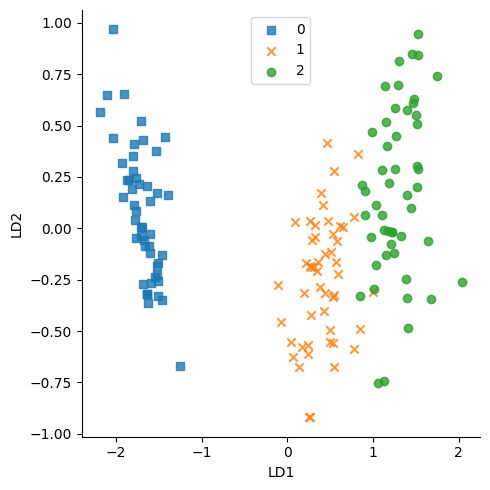

In [61]:
markers = ['s', 'x','o']
sns.lmplot(x="LD1", y="LD2", data=data, markers=markers,fit_reg=False, hue='class', legend=False)
plt.legend(loc='upper center')
plt.show()

# LDA implementation using scikit-learn

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y)

In [63]:
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,8.084953,-0.328454,0
1,7.147163,0.755473,0
2,7.511378,0.238078,0
3,6.837676,0.642885,0
4,8.157814,-0.540639,0


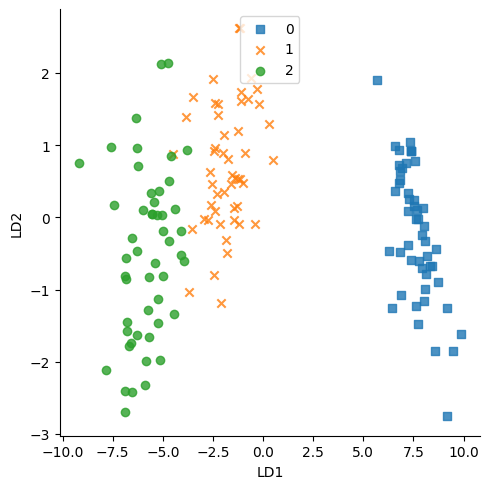

In [64]:
markers = ['s', 'x','o']
colors = ['r', 'b','g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers,fit_reg=False,legend=False)
plt.legend(loc='upper center')
plt.show()